基于mnist数据集，建立mlp模型，实现0-9数字的十分类

1.实现mnist数据载入，可视化图形数字<br>
2.完成数据预处理，图像数据维度转化与归一化，输出结果格式转化<br>
3.计算模型在预测数据集的准确率<br>
4.模型结构：两层隐藏层，每层有392个模型

In [1]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 4s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

可视化部分数据

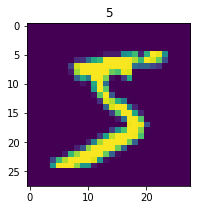

In [5]:
import matplotlib.pyplot as plt
img1 = X_train[0]
fig = plt.figure(figsize=(3,3))
plt.imshow(img1)
plt.title(y_train[0])
plt.show()

In [7]:
# 图片的大小
img1.shape

(28, 28)

In [10]:
# format the input data
feature_size = img1.shape[0]*img1.shape[1]
X_train_format = X_train.reshape(X_train.shape[0],feature_size)
X_test_format = X_test.reshape(X_test.shape[0],feature_size)
X_train_format.shape

(60000, 784)

 归一化处理

In [13]:
X_train_normal = X_train_format/255
X_test_normal = X_test_format/255
X_train_normal[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

tf=2.5.0中导入包:
from keras.utils import to_categorical<br>
显示报错
ImportError: cannot import name 'to_categorical' from 'keras.utils' (/usr/local/lib/python3.7/dist-packages/keras/utils/__init__.py)<br>

现在keras完全置于tf模块中，这个要从tensoflow根模块导入，修改为：<br>
from tensorflow.keras.utils import to_categorical

In [20]:
# format the output data(labels)
from tensorflow.keras.utils import to_categorical
y_train_format = to_categorical(y_train)
y_test_format = to_categorical(y_test)
print(y_train[0])
print(y_test_format[0])

5
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


建立模型

In [21]:
from keras.models import Sequential
from keras.layers import Dense,Activation
mlp = Sequential()
mlp.add(Dense(units=392,activation='sigmoid',input_dim=feature_size))

In [22]:
mlp.add(Dense(units=392,activation='sigmoid'))
mlp.add(Dense(units=10,activation='softmax'))
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 392)               307720    
_________________________________________________________________
dense_1 (Dense)              (None, 392)               154056    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3930      
Total params: 465,706
Trainable params: 465,706
Non-trainable params: 0
_________________________________________________________________


In [23]:
#configure the model
mlp.compile(loss = 'categorical_crossentropy',optimizer='adam')

In [25]:
#模型训练
mlp.fit(X_train_normal,y_train_format,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3471
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1459
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0955
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0676
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0484
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0365
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0278
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0224
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0166
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0141


In [33]:
# 模型评估

# 训练集
import numpy as np 
y_train_predict = mlp.predict(X_train_normal)
y_train_predict=np.argmax(y_train_predict,axis=1)
y_train_predict

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [34]:
# 计算准确率
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train,y_train_predict)
accuracy_train

0.9942833333333333

In [35]:
# 测试集
y_test_predict = mlp.predict(X_test_normal)
y_test_predict = np.argmax(y_test_predict,axis=1)
accuracy_test = accuracy_score(y_test,y_test_predict)
accuracy_test

0.98

Text(0.5, 1.0, '0')

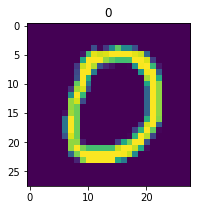

In [36]:
# 可视化
img2 = X_test[10]
fig2 = plt.figure(figsize=(3,3))
plt.imshow(img2)
plt.title(y_test_predict[10])

图像数字多分类实战summary:<br>
1.通过mlp模型，实现了基于图像数据的数字自动识别分类 <br>
2.完成了图像的数字化处理与可视化<br>
3.对mlp模型的输入，输出数据格式有了更深的认识，完成了的数据处理与格式转换<br>
4.建立了结构更为复杂的mlp模型
5.mnist数据集地址：https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz